# 1. Setting the data

Github link: https://github.com/IamAirmanPhoenix/Sprint6_Project

Importing modules/libraries we will be using on the notebook.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from scipy import stats
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
import IPython.display

DataFrame = pd.DataFrame({})

Generating a DataFrame (DF) 'data' using the dataset 'games.csv'.

In [2]:
data = pd.read_csv('/games.csv')

# 2. Preparing the data

On the following code we can know the following information:

 * The columns names have a combination of caps and lowercase characters. We need to homologate them with a 'best practice' option.
 * Our DF have 11 columns and 6 of them have missing values. We need to evaluate if those cells will be filled and the value they will have.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## 2.1. Changing columns names

With the following code we can convert all the columns to lowercase, giving us a better way to manipulate the information on future stages of the project.

In [5]:
data.columns = list(map(lambda column: column.lower(), list(data.columns)))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 2.2. Droping duplicated values

Once evaluating the quantity of duplicated rows, it is concluded the dataset has none duplicated rows and no further process id needed for this point.

In [6]:
data.duplicated().sum()

0

## 2.3. Missing values filling

### a) 'name' column

In this columns we have the name of each videogame on the list and there are 2 missing values (not significant). Replacing missing values with the value 'unknown'.

In [7]:
data['name'] = data['name'].fillna('unknown')
data['name'].isna().sum()

0

Once replaced, verify there are no missing values on the column. No missing values were returned. 

### b) 'year_of_release' column

In this column we have the year each videogame was released to the market and there are 269 missing values. Current values are on float dtype data; in case values can be represented on int dtype values, we can have change to a int dtype values with a better fitting format.

In [8]:
test = data['year_of_release'].fillna(0)

np.array_equal(test, test.astype('int'))

True

After evaluating the column, no information will be lost if column is converted to int dtype values. Proceeding to replacing NaN values with number 0 and converting to int dtype.

In [9]:
if data['year_of_release'].dtypes != int:
    data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')

print(f'Missing values after changes: {data['year_of_release'].isna().sum()}.')
data['year_of_release'].unique()

Missing values after changes: 0.


array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

Confirming we have the values as wanted.

### c) 'genre' column

This column has the genre each videogame is categorized. Even though is possible to work with this information as an object dtype data, in this case they will be converted to a categorical data. First fill the NaN values with 'no_genre' and then convert it to category dtype.

In [10]:
if data['genre'].dtypes == object:
    data['genre'] = data['genre'].fillna('no_genre').astype('category')

print(f'Missing values after changes: {data['genre'].isna().sum()}.')
data['genre'].unique()

Missing values after changes: 0.


['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', ..., 'Action', 'Fighting', 'Adventure', 'Strategy', 'no_genre']
Length: 13
Categories (13, object): ['Action', 'Adventure', 'Fighting', 'Misc', ..., 'Simulation', 'Sports', 'Strategy', 'no_genre']

Confirm changes were applied correctly.

### d) 'critic_score' column

This column has the score the various critic medias have given to the specific game in the dataset; it has 8578 missing values. It is important to determine how the missing values in this column shall be filled (in case if required) due to more than 50% of the dataset column is missing.

In my opinion, the best way to fill the missing values is to group the DF by 'platform-genre' relation and analyze whether the median or mean value is the best option to fill the missing values for each tuple 'platform-genre'. To make things simplier, for this case this will be determined comparing the mean and median values of all the existing values on the source dataset.

In [11]:
mean_critic = data['critic_score'].mean()
median_critic = data['critic_score'].median()

print(f"Median value: {median_critic}; and mean value: {mean_critic}.")

Median value: 71.0; and mean value: 68.96767850559173.


The values obtained are mean aprox. 69 and median 71. Though the diference between these two values indicates the data has a tendency of lower values, the diference is not significant enough to state either the median or mean value is the best option.

In my opinion, the best option to fill the missing values is the mean. This is because I consider better to give the lowest acceptable value possible in those cases missing values are more than existing values.

Though filling the missing values with the mean value will cause the tendency of data for all of the future analysis to be near the mean value, trying to get the real values for those rows could be more time consuming and not always can be possible to work with all the information.

In [12]:
test_3 = data['critic_score'].fillna(69)

np.array_equal(test_3, test_3.astype('int'))

True

Testing with the filling if making a change to a dtype int column will generate missing values. Once confirmed it will not, continue making the changes on the DF.

In [13]:
if data['critic_score'].dtypes != int:
    data['critic_score'] = data['critic_score'].fillna(69).astype('int')

print(f'Missing values after changes: {data['critic_score'].isna().sum()}.')
data['critic_score'].unique()

Missing values after changes: 0.


array([76, 69, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 50, 25, 42, 44, 55, 48, 57, 29, 47,
       65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39, 34,
       35, 41, 36, 28, 31, 27, 26, 19, 23, 24, 21, 17, 22, 13])

Once confirmed all changes were applied correctly, continue with next step.

### e) 'user_score' column

'user_score' is the column where the information of the score given by the users for a specific videogame, and has 6701 missing values. This column has a dtype object, which has to be changed because the values are meant to be processed as numbers (float numbers in this case, so we will change its dtype to it). Before applying the changes to the DF, analize if the missing values shall be filled with the mean value or the median value of the column.

In [14]:
test_4 = pd.to_numeric(data['user_score'], errors='coerce')

test_mean = test_4.mean()
test_median = test_4.median()

print(f"Median value: {test_median}; and mean value: {test_mean}.")

Median value: 7.5; and mean value: 7.125046113306982.


For the current column, the median and mean values do not vary much between them. Contrary as in 'critic_score', in this column the missing values will be filled with the median value because in my opinion the data will be less ambiguous than using the mean value and deciding to select 7.1 or 7.2 as standarize value.

In [15]:
if data['user_score'].dtype != float:
    data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
    data['user_score'] = data['user_score'].fillna(test_median)


print(f'Missing values after changes: {data['user_score'].isna().sum()}.')
data['user_score'].unique()

Missing values after changes: 0.


array([8. , 7.5, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8, 5.6,
       5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5,
       1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. , 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

Confirm changes where applied correctly and continue with the project.

### f) 'rating' column

The 'rating' column has the information of the category in which the ESRB rates each of the videogames in the source dataset, and it has 6766 missing values. As seen below, this column has  dtype object values in it and one of the unique values is NaN (which we will be replacing). 

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Replacing NaN values with a representative vale 'no-rating' to state we do not know the ESRB's rating for that specific videogame, and then converting the dtype of the column to dtype category data.

In [17]:
if data['rating'].dtypes == object:
    data['rating'] = data['rating'].fillna('no-rating').astype('category')


print(f'Missing values after changes: {data['rating'].isna().sum()}.')
data['rating'].unique()

Missing values after changes: 0.


['E', 'no-rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']
Categories (9, object): ['AO', 'E', 'E10+', 'EC', ..., 'M', 'RP', 'T', 'no-rating']

Confirm all cahnges were applied correctly and continue with the project.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16715 non-null  int64   
 3   genre            16715 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     16715 non-null  int64   
 9   user_score       16715 non-null  float64 
 10  rating           16715 non-null  category
dtypes: category(2), float64(5), int64(2), object(2)
memory usage: 1.2+ MB


Confirming that all changes were applied checking on the info of the DF. None of the columns have missing values and also the dtype changes we applied previously can be seen at this point.

# 3. Analizing the data

## 3.1. How many games were launched on every year?

On below code is shown the distribution of games launches per year on the dataset 'games.csv', in which we can see an increase from the first year (1980) to its peak on years 2008 and 2009 and an continuous decrease after it.

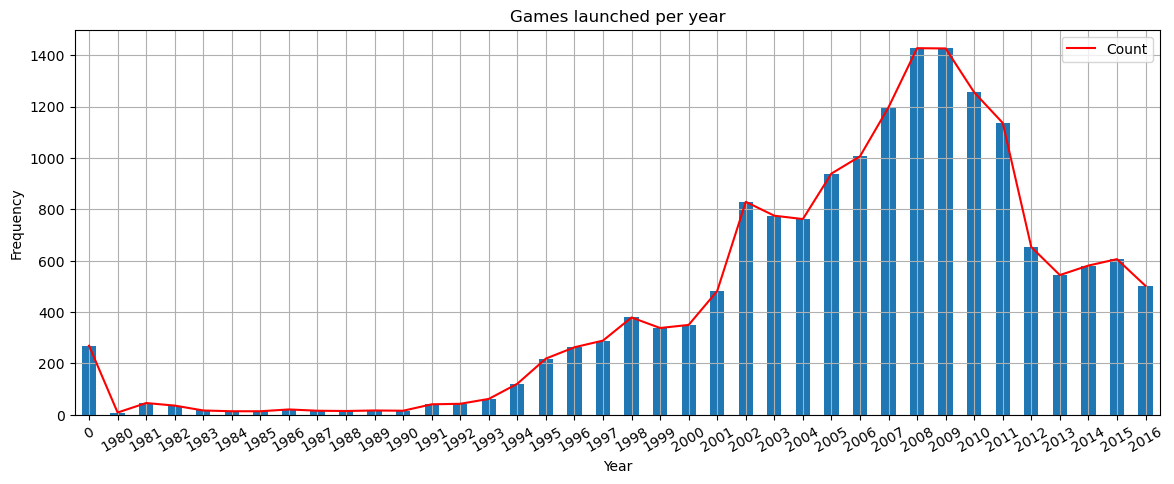

In [19]:
games_per_year = data[data['year_of_release'] != 'no_year'].groupby('year_of_release', observed=True)['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'count']

games_per_year.plot(kind='bar',
                    x='year_of_release',
                    y='count',
                    grid=True,
                    xlabel='Year',
                    ylabel='Frequency',
                    title='Games launched per year',
                    figsize=[14,5],
                    rot=30)
plt.plot(games_per_year['count'], color='red')
plt.legend(['Count'])
plt.show()

To determine if there are significant values for the overall launches of the dataset, is needed to look for atypical values in the data population. Applying a boxplot (as seen below) on the data, is determine all values are significant for this application due the lack of atypical values.

Both plots explain us this distribution has an asymmetry to the right, which will lead to a greater mean compared to the median.

<Axes: xlabel='count'>

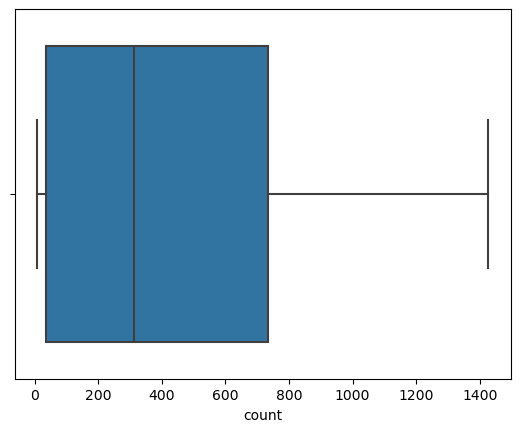

In [20]:
sns.boxplot(x=games_per_year['count'], orient='h')

## 3.2. Sales distribution by platform

We need to know the distribution of the most popular platforms according the dataset, so let's create a dataframe with the information grouped as we need it. Creating a pivot table using the columns 'platform' and 'year_of_release' as index we can sum columns 'na_sales', 'eu_sales', 'jp_sales' and 'other_sales' values obtaining the sales by region for all the platform-year relations on the dataset. Once here we can generate a new column 'total_sales' which is the sum of the sales of all regions for all the relations platform-year.

In [21]:
# Main DF to get information for this point
pivot_total = data.pivot_table(index=['platform', 'year_of_release'],
                           values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                           aggfunc='sum',
                           observed=True)

pivot_total['total_sales'] = pivot_total['na_sales'] + pivot_total['eu_sales'] + pivot_total['jp_sales'] + pivot_total['other_sales']
main_df = pivot_total.reset_index()

If we only need to know the top 10 most sold platforms of all times we can use the below code and get a list with that information (on descending order).

In [51]:
# New DF to grouped by platform to know the exact total sales for all the years
pivot_df = main_df.pivot_table(index='platform',
                                values='total_sales',
                                aggfunc='sum')

popular_df = pivot_df.sort_values(by='total_sales', ascending=False).head(10)
list(popular_df.index)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

Same code as below with a better format.

In [23]:
test_string = ''

for platform in popular_df.index:

        test_string += f"{platform}, "

test_string = test_string[:-2]

print(f"The top 10 best sold platforms are (descending order): {test_string}.")

The top 10 best sold platforms are (descending order): PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC.


In [24]:
#print(main_df)
pivot_total.unstack()
pivot_total

eu_sales  jp_sales  na_sales  other_sales  \
platform year_of_release                                              
2600     0                    0.61      0.00      9.82         0.07   
         1980                 0.67      0.00     10.59         0.12   
         1981                 1.96      0.00     33.40         0.32   
         1982                 1.65      0.00     26.92         0.31   
         1983                 0.34      0.00      5.44         0.06   
...                            ...       ...       ...          ...   
XB       2008                 0.04      0.00      0.13         0.01   
XOne     2013                 5.34      0.02     11.85         1.75   
         2014                18.15      0.14     30.97         4.81   
         2015                18.47      0.17     36.03         5.47   
         2016                 9.63      0.01     14.27         2.24   

                          total_sales  
platform year_of_release               
2600     0                      10.50  
         1980                   11.38  
         1981                   35.68  
         1982                   28.88  
         1983                    5.84  
...                               ...  
XB       2008                    0.18  
XOne     2013                   18.96  
         2014                   54.07  
         2015                   60.14  
         2016                   26.15  

[254 rows x 5 columns]

In case we need to plot on a line chart showing the distribution per year for the top 10 best sold platforms we can use the code below.

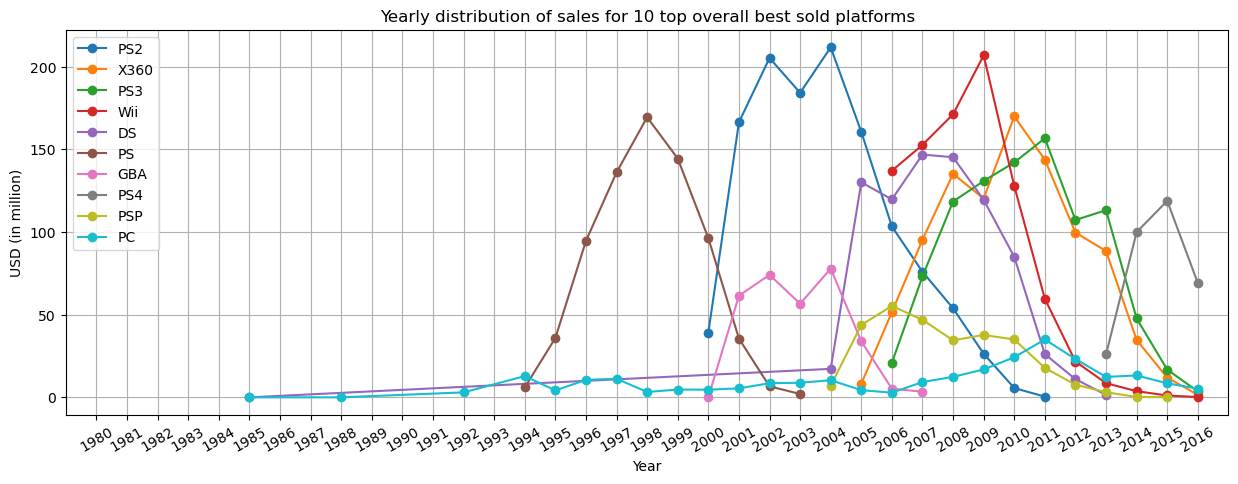

In [25]:
# Getting the canvas to modify the plot below
fig, ax = plt.subplots()

#Getting main DF on a new variable
pivot_total_test = pivot_total

for platform in popular_df.index:

    # Droping the rows with a 'year_of_release' value equal 0 used to fill missing values
    pivot_total_test = pivot_total_test.drop(0, level='year_of_release')

    # Plotting the interest data
    pivot_total_test.loc[platform, 'total_sales'].plot(figsize=[15,5],
                                                       rot=30,
                                                       marker='o',
                                                       grid=True,
                                                       xlabel='Year',
                                                       ylabel='USD (in million)',
                                                       title='Yearly distribution of sales for 10 top overall best sold platforms',
                                                       xlim=[1979, 2017])


# Adjusting the dimensions, labels and legends for the plot
ax.set_xticks(np.arange(1980,2018,1))
plt.legend(popular_df.index)
plt.xticks(labels=np.arange(1980, 2017, 1), ticks=np.arange(1980,2017,1))
plt.show()

And if we are interested on knowing the time each platform last to reach its peak and the time they took to reach their lowest sales (commonly the last value of sales so we use the last sales as the lowset sales), we can see the result for the code below.

In [26]:
for platform in popular_df.index:

    # Getting maximum 'total_sales' value for each platform
    max_sales = main_df[main_df['platform'] == platform]['total_sales'].max()
    max_val = pd.to_numeric(main_df[(main_df['platform'] == platform) & (main_df['total_sales'] == max_sales)]['year_of_release'], errors='coerce', downcast='integer').max()

    # Getting first 'total_sales' value for each platform
    first_val = main_df[main_df['platform'] == platform]['year_of_release'].iloc[0]

    # Getting last 'total_sales' value for each platform
    last_val = main_df[main_df['platform'] == platform]['year_of_release'].iloc[-1]

    # Evaluating if first value is equal to 0, in case True is replaced with the following value of its list
    if first_val == 0:
        first_val = main_df[main_df['platform'] == platform]['year_of_release'].iloc[1]

    # Evaluating if last value is equal to 0, in case True is replaced with the following value of its list
    if last_val == 0:
        last_val = main_df[main_df['platform'] == platform]['year_of_release'].iloc[-2]

    # Printing a string with the information for the specific platform
    print(f"La plataforma '{platform}' tardo en llegar a su maximo {max_val-first_val} años y en dejar de ser popular {last_val-max_val} años.\n")

La plataforma 'PS2' tardo en llegar a su maximo 4 años y en dejar de ser popular 7 años.

La plataforma 'X360' tardo en llegar a su maximo 5 años y en dejar de ser popular 6 años.

La plataforma 'PS3' tardo en llegar a su maximo 5 años y en dejar de ser popular 5 años.

La plataforma 'Wii' tardo en llegar a su maximo 3 años y en dejar de ser popular 7 años.

La plataforma 'DS' tardo en llegar a su maximo 22 años y en dejar de ser popular 6 años.

La plataforma 'PS' tardo en llegar a su maximo 4 años y en dejar de ser popular 5 años.

La plataforma 'GBA' tardo en llegar a su maximo 4 años y en dejar de ser popular 3 años.

La plataforma 'PS4' tardo en llegar a su maximo 2 años y en dejar de ser popular 1 años.

La plataforma 'PSP' tardo en llegar a su maximo 2 años y en dejar de ser popular 9 años.

La plataforma 'PC' tardo en llegar a su maximo 26 años y en dejar de ser popular 5 años.



CONCLUSION

 * 1. Most of the best sold platforms around all regions are past generations platforms as we can see on line chart because most of them were launched between 2000 - 2006, with exception for the PC and DS platforms (with videogames on 1985) and the PS4 launched on 2013. Is interesting having a value for the DS on 1985, so checking on it we can see it represents the title 'Strongest Tokyo University Shogi DS' which can mean a wrong filling on the platform or the year or release for this value. For a more detailed correction, maybe a revalidation for the data can be applied to the dataset, but for pratical purposes as this is the only mismatching value and is not drastically relevant to the results (because if we ignore this lecture the values for the DS platform will start on 2004 and the sales for this specific is a low value), we can ignore this value.

 * 2. Most of the best sold platforms take around 2 to 5 years to reach their peak on sales, with exceptions on DS (22 years if starting on 1985 or 3 years if 2004) and PC with 22 years. 
 
 * 3. Most of consoles last 5 to 7 to reach their last sales value (commonly the lowest) with exceptions on the GBA with 3 years and the PSP with 9 years.


 Something interesting is the PS4 took 2 years to reach its sales peak (which is the minimum value for the previous platforms) and is the only console of the 'current generation' which is in the top 10 best sold platforms (above the PSP and PC). Also, all other platforms are being bought less frequently and are reaching almost values of 0. So we can assume a correct strategy for 2017 is promote PS4 games more to increase the sales, but there is a questions we can't answer with this information:

  ~ Are there other platforms we should promote?

Let's see if we can get an answer for this question.

## 3.3. Determine the year to start taking the data

We need to determine which are the years we are going to work with because some of the data can be ignored due to its low values (the first years of the lectures). Arbitrary, I decide working with data from 1995 onwards, so we can work with 'total_sales' values above 200M USD. Also to use data within the 95% of a normal distribution.

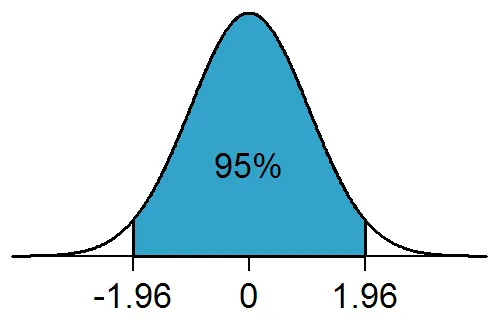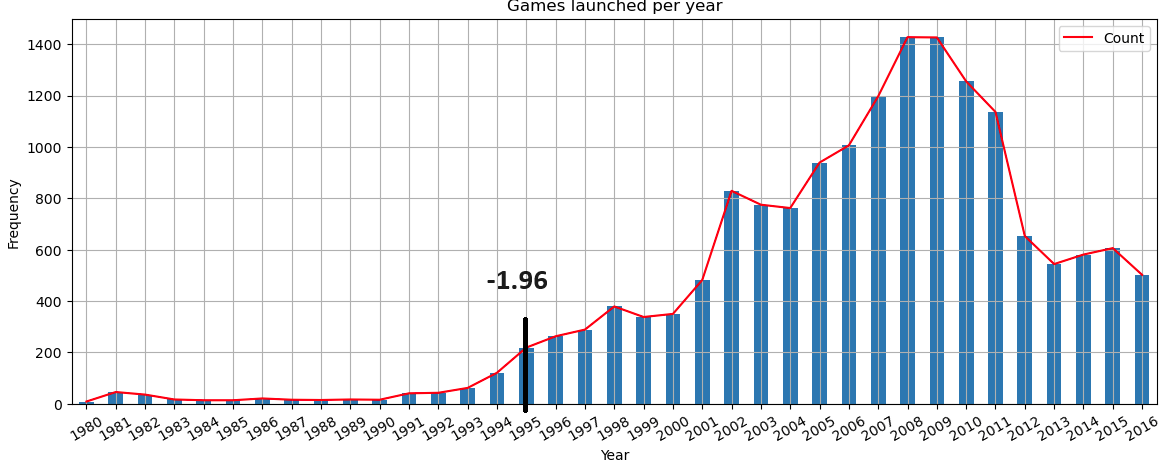

## 3.4. Which platforms are top now?

 * The main question is: Was there a change on the top 10 best sold platforms with this change?

From positions 1 to 6 and 8 was no change, PS4 got to 7th position from 9th, GBA change from 7th position to 9th and 3DS got on 10th position in place of PC.

This may indicate 3DS and PS4 are platforms we should promote because those are 'current generation' platform. We can also suppose this may indicate promoting all the current generation platforms, but further analysis is required to confirm this.

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

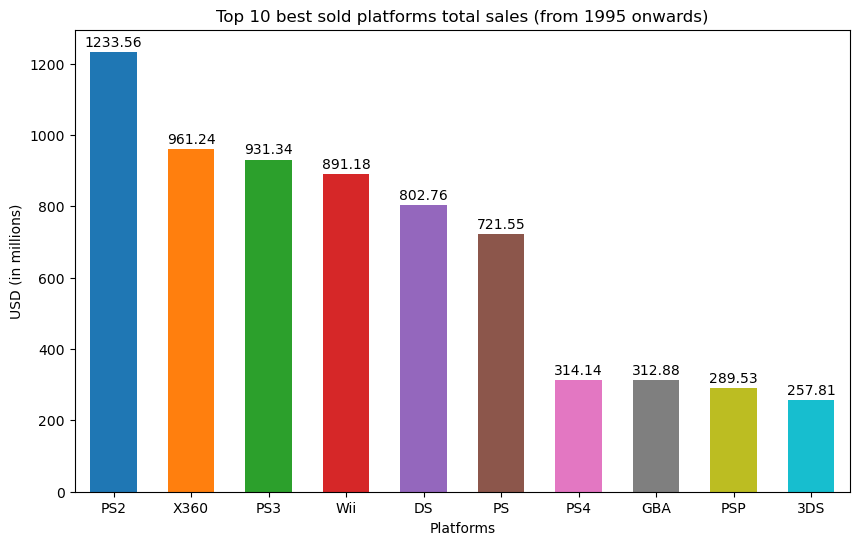

In [27]:
# Getting the new DF for the vales with 'year_of_release' above 1995
pivot_filtered = (pivot_total.drop(range(1980, 1995, 1), level='year_of_release').drop(0, level='year_of_release').reset_index()
                            ).groupby('platform')['total_sales'].sum().sort_values(ascending=False)

fig, ax = plt.subplots()

# Plotting new values on a bar plot
pivot_filtered.head(10).plot(kind='bar',
                             rot=0,
                             xlabel='Platforms',
                             ylabel='USD (in millions)',
                             title='Top 10 best sold platforms total sales (from 1995 onwards)',
                             figsize=[10,6])

# Adding a label above each bar with its value
pos = 0
for console, sales in (pivot_filtered.head(10)).items():
    rects = ax.bar(pos, sales, 0.6, label=console)
    ax.bar_label(rects, padding=2)
    pos += 1

plt.show()

## 3.5. Creating a boxplot showing total sales for all platforms.

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Most platforms in the boxplot are past generations platforms, so I decided to focus on a few platforms which I consider may be of interest for 2017 campaign:

 * 3DS: Predecesors of this consoles are the GB, GBA and DS. All of this consoles show an increase on sales from one to other with a average above the median from GBA onwards. This may imply we should except more sales in a couple of years in the future for the 3DS.

 * PS4: Predecesors of this consoles are the PS, PS2 and PS3. PS2 had higher maximum sales compared of the PS, but the PS3 had lower maximum values compared to the PS2. Nevertheless, The PS3 has an average total sales highly above the median compared with both the PS and PS2. We should expect high acceptation for the PS4 following past consoles history, and their total sales being the highest among the most recent consoles may imply we shall promote PS4 games.

 * XOne: Predecesors of this console are the XB and X360. Despite XB not been sold quite well, X360 presented average total sales above the median. Despite the XOne not being sold enoughcompared with other current generation platforms, average sales are around the median value. I suggest a moderate plan of promoting for the games of this platform.

 * WiiU: Predecesor of this console is the Wii. Compared with its predecesor, WiiU has a drastical difference in sales with minimal sales and even with average sales below the median value. I do not recomend promoting this console frequently as the data does not give positive results to this strategy.

<Axes: xlabel='platform', ylabel='total_sales'>

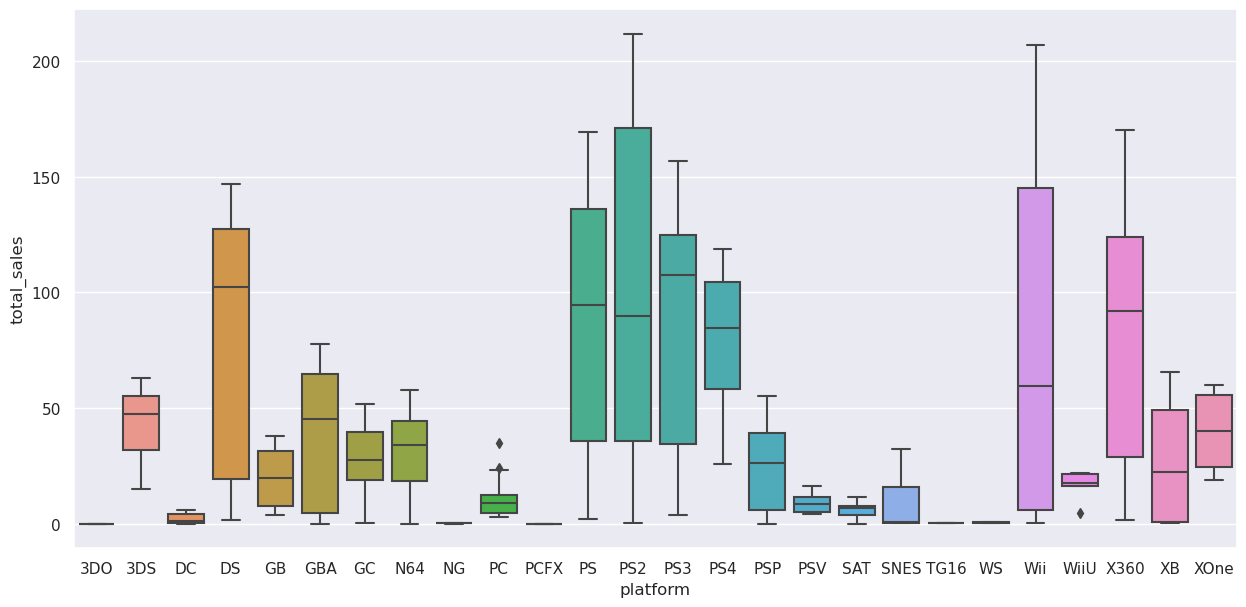

In [52]:
# Getting info for boxplot
pivot_boxplot = pivot_total.drop(range(1980, 1995, 1), level='year_of_release').drop(0, level='year_of_release').reset_index()

# Setting canvas and values for boxplot chart
sns.set_theme(rc={"figure.figsize":(15, 7)})
sns.boxplot(data=pivot_boxplot, x='platform', y='total_sales')

## 3.6. Do the users score and critic score have an impact on the sales of a platform?

With the code below we can see the information we need for the selected platform 'the PS2'.

              critic_score  user_score  total_sales
critic_score      1.000000    0.237143     0.225650
user_score        0.237143    1.000000     0.650604
total_sales       0.225650    0.650604     1.000000


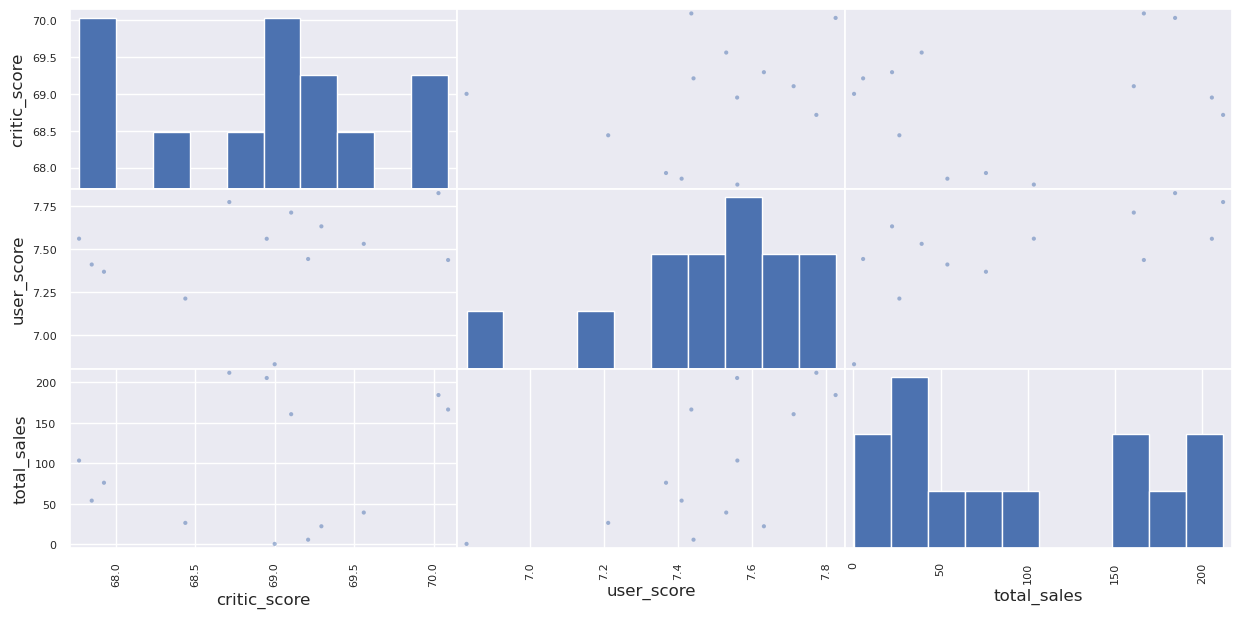

In [29]:
# Getting the values sorted by platform and year, and then get the mean value for each relation platform-year
pivot_userSales = data.pivot_table(index=['platform', 'year_of_release'],
                                   values=['user_score', 'critic_score'],
                                   aggfunc='mean').merge(pivot_total, how='left', left_index=True, right_index=True).drop(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], axis=1)


# Plotting a scatter matrix for the selected platform (the PS2)
pd.plotting.scatter_matrix(pivot_userSales.loc['PS2'], grid=True)

# Obtaining the correlation matrix for the selected platform (the PS2)
critics_corr = pivot_userSales.loc['PS2'].corr()

print(critics_corr)

From the scatter matrix and the correlation matrix we can conslude the following:

 * 1. The critic score did not affect almost the total sales of the PS2. We can see this with a scatter plot dispersed and a correlation value of 0.22, which means a weak positive relation between them.

 * 2. The user score did affect significantly on the total sales of the PS2. We can see this with a scatter plot with a increase tendency and a correlation value of 0.65, which means a significant strong positive relation between them.

## 3.7. Did the titles sold on the PS2 have a different distribution for the other platforms they were sold? 

We may be interested on the quantity of titles sold on the PS2, and we can get on the below code the PS2 had 2161 titles sold. Considering the quantity of titles, creating a way to plotting their total sales per platform instead of viewing their variations per platform may be a good idea. Let's get the information to do so. We do not need to filter for values above 1995 because the PS2 was launched after that year.

In [53]:
data[data['platform'] == 'PS2']['name'].nunique()

2161

Generating a DF to get the qty. of consoles each title for the PS2 was launched for and another one to get the main information of geions sales.

In [54]:
# Generating a games_count DF to get the quantity of platforms each game for the PS2 was released and discarting all rows with titles that were not released for other platforms
games_count = data.groupby('name').count()
games_count = games_count.loc[data[data['platform'] == 'PS2']['name'].unique()].sort_values(by='platform', ascending=False)
games_count = games_count[games_count['platform'] > 1]

# Generating a games_info DF with the total sales for all games across all regions, selecting the titles that were launched on PS2 and at least one platform more
# and generating the total sales for all those titles
games_info = data.pivot_table(index=['name', 'platform'],
                              values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                              aggfunc='sum')
games_info = games_info.loc[games_count.index]
games_info['total_sales'] = games_info['na_sales'] + games_info['eu_sales'] + games_info['jp_sales'] + games_info['other_sales']

# Obtaining a list of all the titles that were launched on the PS2 and at least another platform
ps2_games = list(games_count.index)

# Getting a list with the qty. of platforms all games launched on PS2 and at least one platform more were launched and printing the first 10 on descending order
games_count['platform'].head(10)

name
Need for Speed: Most Wanted                    12
Madden NFL 07                                   9
Ratatouille                                     9
Cars                                            8
Monopoly                                        8
LEGO Star Wars II: The Original Trilogy         8
Madden NFL 08                                   8
LEGO Indiana Jones: The Original Adventures     7
FIFA Soccer 11                                  7
Wall-E                                          7
Name: platform, dtype: int64

In [32]:
# Example of the information for a title in the games_info DF
games_info.loc['Need for Speed: Most Wanted']

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
DS,0.01,0.00,0.24,0.02,0.27
GBA,0.07,0.00,0.19,0.00,0.26
GC,0.11,0.00,0.43,0.02,0.56
PC,0.29,0.00,0.02,0.06,0.37
PS2,1.79,0.08,2.03,0.47,4.37
PS3,1.46,0.06,0.71,0.58,2.81
PSV,0.45,0.01,0.33,0.22,1.01
WiiU,0.12,0.00,0.13,0.02,0.27
X360,0.91,0.03,1.62,0.25,2.81


Generating a function to plot the information we have in a fitting way. I decided to use a radar plot for this information.

In [33]:
# Used references:
# https://www.pythoncharts.com/matplotlib/radar-charts/
# https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html

def scatterPolar(x:str=''):

    '''
    This function generate a radar plot for a selected title in the combobox widget which contains the list ps2_games.
    It generates the labels, values and angles for plotting each title across the polar plot and adjusts its dimensions
    depending of the qty. of rows on each title index.
    '''

    # If no value is selected on widget, fill with the first value on ps2_games list.
    # Else, use the widget value.
    if x == '':
        x = ps2_games[0]
    else:
        x = x

    # Generating the values, labels and angles each row must have on the plot.
    vals = list(games_info.loc[x]['total_sales'])
    names = list(games_info.loc[x].index)
    angles = np.linspace(0, 2 * np.pi, len(names), endpoint=False).tolist()

    # Append all lists with their first values to get a close plot.
    vals.append(vals[0])
    angles.append(angles[0])
    names.append(names[0])

    # Plotting the information for the title with a fill.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, vals, color='red', linewidth=1)
    ax.fill(angles, vals, color='red', alpha=0.25)

    # Setting the angles for the current plot.
    ax.set_thetagrids(np.degrees(angles), names)

    # Setting a title.
    plt.title(f"Platforms sales for '{x}':")


# Setting an interactive combobox with all the titles and calling on scatterPolar function
widgets.interactive(scatterPolar, x=widgets.Combobox(placeholder='Choose a game', options=ps2_games, value=None, description='Game:'))

interactive(children=(Combobox(value='', description='Game:', options=('Need for Speed: Most Wanted', 'Madden …

Due the quantity of titles launched for the PS2 and other consoles (2161 titles), let generalize with the top 10 titles with more launches across platforms:

 * We can see the PS2 was the main platform for titles like 'Need for Speed: Most Wanted', 'Madden NFL 07/08' and 'LEGO Star Wars II: The Original Trilogy', which are racing, sports and action genres games.

 * Titles like Ratatouille and Wall-E (casual/platforms genres) were not sold as much as other titles on the PS2, but were sold quite well on other platforms.

 * The title 'FIFA Soccer 11' despite being a sports title, was not sold well on PS2, but it was on PS3. This may be a clear signal the sports genre is a favorite among the PS users even across generations.

CONSLUSIONS

The PS2 had clear favorite genres among its users which was represented on big sales on titles of those genres (action, sports and racing titles), but in other genres (as in casual and platforms genres) did not sold quite well. A good suggestion may be checking if this tendency remains and use this information to promote more games of the following genres for the actual PS4 platform.

## 3.8. Most rentable genres across platforms

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Is there a relation between the titles genre and their expected total sales with the information we have? Let's analyze this point viewing the distribution among genres across all platforms.

/home/huanho/miniconda3/envs/myenv/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='genre', ylabel='total_sales'>

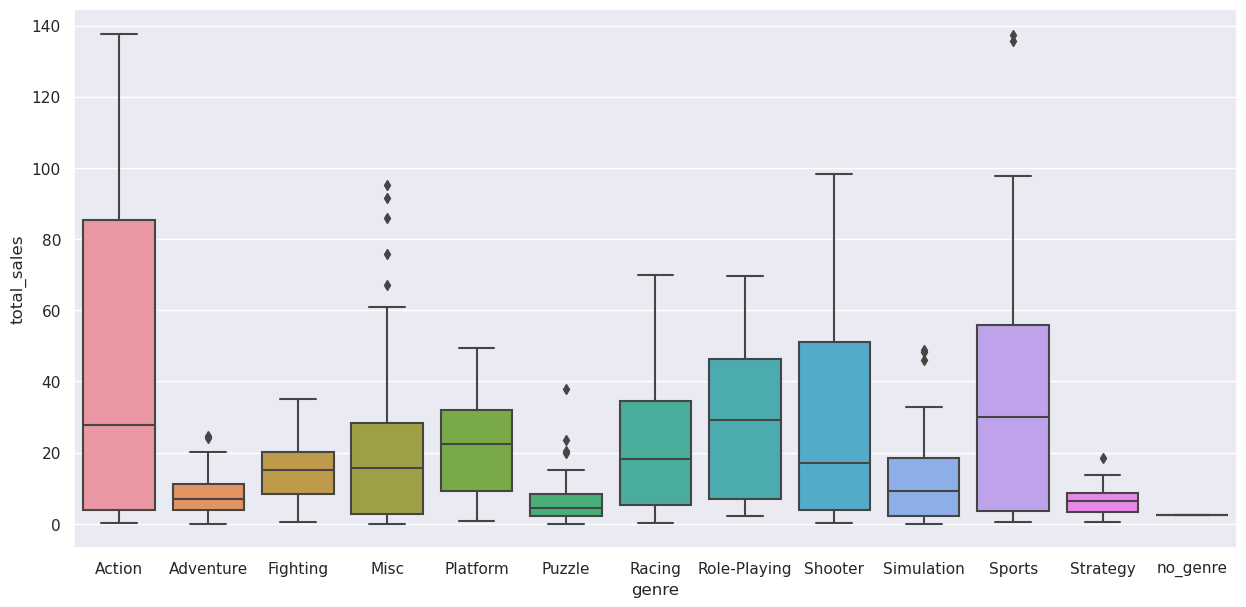

In [34]:
# Getting a DF indexed by genre and year and obtaining the summ of sales among all regions
pivot_genres = data.pivot_table(index=['genre', 'year_of_release'],
                                values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                                aggfunc='sum',
                                observed=True).drop(0, level='year_of_release')

# Creating a new column for total sales
pivot_genres = pivot_genres.assign(total_sales = lambda x: (pivot_genres['eu_sales'] + pivot_genres['jp_sales'] + pivot_genres['na_sales'] + pivot_genres['other_sales'])
                            ).drop(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], axis=1).reset_index()

# Plotting the distribution with a boxplot
sns.boxplot(data=pivot_genres, x='genre', y='total_sales')

The distribution tells us the following points:

 * The most popular genres are: Action, Sports, Shooter, Role-Playing and Racing. All of them lead the distribution and contain the top sales across the genres (the sports genre has a few exceptions on sales with atypical values above its whiskers). Typicaly their mean value is below the median (as in the case of action and shooter genres) with exception of the role-playing genre. These are the genres where is expected to get more profit.

 * The least popular genres (ignoring 'no genre') are: Strategy, Puzzle and Adventure. These genres are the last ones on general sales and all of the present atypical values, maybe implying their sales are not quite popular among the users. These are the genres where is expexted to get less profit.

# 4. Creating an user profile per region

For each region (NA, UE, JP) determine:

* Top 5 platforms. Describe the variations on their market quotes among regions.
* Top 5 genres. Explain the differences.
* Does ESRB ratings impact on individual regions sales?

In [35]:
regions_list = ['na_sales', 'eu_sales', 'jp_sales']

def sales_regions(regions:list=regions_list) -> tuple(DataFrame):

    '''
    This function returns a tuple of 3 DFs with the total sales for all regions on region_list by platform,
    genre and ESRB rating
    '''

    # Empty DFs for each inquiry. Indices got by sorted unique values on main dataset.
    platform_df = pd.DataFrame({'platform': data['platform'].sort_values().unique()})
    genre_df = pd.DataFrame({'genre': data['genre'].sort_values().unique()})
    rating_df = pd.DataFrame({'rating': data['rating'].sort_values().unique()})

    # For loop for the 3 regions
    for region in regions:

        # Filling info by platform for the current region on loop and saving it locally
        locals()['{}_platform'.format(region)] = data.pivot_table(index='platform',
                                                                  columns='year_of_release',
                                                                  values=region,
                                                                  aggfunc='sum',
                                                                  observed=True)
        
        # Filling info by genre for the current region on loop and saving it locally
        locals()['{}_genre'.format(region)] = data.pivot_table(index='genre',
                                                               columns='year_of_release',
                                                               values=region,
                                                               aggfunc='sum',
                                                               observed=True)
        
        # Filling info by rating for the current region on loop and saving it locally
        locals()['{}_rating'.format(region)] = data.pivot_table(index='rating',
                                                                columns='year_of_release',
                                                                values=region,
                                                                aggfunc='sum',
                                                                observed=True)
        

        # Getting a total column with the sum of the sales among all years on the current region DFs
        locals()['{}_platform'.format(region)]['{}_total'.format(region)] = locals()['{}_platform'.format(region)].sum(axis=1)
        locals()['{}_genre'.format(region)]['{}_total'.format(region)] = locals()['{}_genre'.format(region)].sum(axis=1)
        locals()['{}_rating'.format(region)]['{}_total'.format(region)] = locals()['{}_rating'.format(region)].sum(axis=1)

        # Merging all the interest info in the empty DFs on the start of the function
        platform_df = platform_df.merge(locals()['{}_platform'.format(region)]['{}_total'.format(region)], on='platform')
        genre_df = genre_df.merge(locals()['{}_genre'.format(region)]['{}_total'.format(region)], on='genre')
        rating_df = rating_df.merge(locals()['{}_rating'.format(region)]['{}_total'.format(region)], on='rating')
    
    # Returnin the DFs
    return platform_df, genre_df, rating_df


# Saving the information on 3 new variables
platform_sales, genre_sales, rating_sales = sales_regions(regions_list)

In [36]:
def top5_on_region(data:DataFrame) -> str:

    '''
    This function uses as input one of the DFs genrated on sales_regions() function and generates a string with the
    top 5 rows for the data the used DF represents. Ex.: platform_sales will return the top 5 platforms among regions.
    '''

    # Local string in which all info will be placed
    loc_string = f"The top 5 {data.columns[0]} are:\n\n"

    # Evaluating each column except first (which is the kind data we want to know)
    for column in data.columns[1:]:

        # Sorting values in descending order for each column (region) and get the first 5
        vals_list = data[column].sort_values(ascending=False).head(5)

        # Getting their labels
        platforms_val = data.iloc[list(vals_list.index), 0]

        # Adding to the string the region information
        loc_string += f"For {column}: (USD in millions)\n"

        # For loop to get from first to last of the 5 values
        for pos in range(0, 5, 1):

            # Adding to string the label and its value
            loc_string += f"{pos + 1}: {platforms_val.iloc[pos]} = {vals_list.iloc[pos]}\n"

        # New string to give space for next region
        loc_string += f"\n"

    # Printing the string
    return print(loc_string)

## 4.1. Top 5 platforms.

In [37]:
top5_on_region(platform_sales)

The top 5 platform are:

For na_sales_total: (USD in millions)
1: X360 = 602.47
2: PS2 = 583.84
3: Wii = 496.9
4: PS3 = 393.48999999999995
5: DS = 382.4

For eu_sales_total: (USD in millions)
1: PS2 = 339.28999999999996
2: PS3 = 330.29
3: X360 = 270.76
4: Wii = 262.21000000000004
5: PS = 213.61

For jp_sales_total: (USD in millions)
1: DS = 175.57
2: PS = 139.82
3: PS2 = 139.20000000000002
4: SNES = 116.55000000000001
5: 3DS = 100.67




The information above gives us the following statements:

 * 1. North America and Europe preferes consoles like X360, PS3 and their predecesors (with the Wii). This may imply those regions preffer home video game consoles over handheld consoles.

 * 2. Japan preffers handheld consoles (like DS & 3DS) and past generations consoles (PS & SNES).

## 4.2. Top 5 genres.

In [38]:
top5_on_region(genre_sales)

The top 5 genre are:

For na_sales_total: (USD in millions)
1: Action = 879.01
2: Sports = 684.43
3: Shooter = 592.24
4: Platform = 445.50000000000006
5: Misc = 407.27

For eu_sales_total: (USD in millions)
1: Action = 519.1299999999999
2: Sports = 376.79
3: Shooter = 317.34
4: Racing = 236.51000000000002
5: Misc = 212.74

For jp_sales_total: (USD in millions)
1: Role-Playing = 355.40999999999997
2: Action = 161.42999999999998
3: Sports = 135.54
4: Platform = 130.83
5: Misc = 108.11000000000001




The information above gives us the following statements:

 * 1. Action and sports genres are the most popular genres among regions, following with the shooter genre.

 * 2. Japan has an evident prefference with the role-playing genre.

 * 3. North America consumes a considerable amount of platform genre games, and in case of Europe racing genre games.

 * 4. The 'misc' genre is slightly popular on all regions.

## 4.3. ESRB ratings sales impact.

In [39]:
top5_on_region(rating_sales)

The top 5 rating are:

For na_sales_total: (USD in millions)
1: E = 1292.9899999999998
2: no-rating = 1242.4600000000003
3: T = 759.7500000000001
4: M = 748.48
5: E10+ = 353.31999999999994

For eu_sales_total: (USD in millions)
1: E = 710.25
2: no-rating = 613.83
3: M = 483.96999999999997
4: T = 427.03
5: E10+ = 188.52

For jp_sales_total: (USD in millions)
1: no-rating = 841.96
2: E = 198.10999999999999
3: T = 151.40000000000003
4: M = 64.24
5: E10+ = 40.199999999999996




The information above gives us the following statements:

 * 1. The E raintg is the most sold among all regions.

 * 2. On average, the order of best sold genres among regions is: E, T, M, E10+. This may imply the titles are better sold if the games is intended to be played by a lower-age audience.

 * 3. Japan has a 'leakage' of information on the ratings and we can see this on 'no-rating' being the top rating in the region (the filler value we gave to the rating column on past steps).

# 5. Hyphotesis testing

## 5.1. Are the average users scores for XBox One and PC the same?

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

To answer this question let's establish the nule hyphotesis (H0) as the following:

 * "The average users scores for XBox One and PC ARE the same".

So our alternative hyphotesis (H1) is:

 * "The average users scores for XBox One and PC ARE NOT the same".

With this in mind, let's get the information organized as we need.

In [57]:
# Create a new DF with the mean user score of all years for all platforms using them as index
users_platform = data.pivot_table(index='platform',
                                  columns='year_of_release',
                                  values='user_score',
                                  aggfunc='mean',
                                  observed=True)

# Get the values for XOne & PC
users_platform.loc[['XOne', 'PC']]

users_XOne = users_platform.loc['XOne']
users_PC = users_platform.loc['PC']

As we can see above, we have many missing values on this new DF so we have to fill them. We have 2 possible solutions: the mean value and the median value.

Below we got the mean and median values for both platforms and once evaluated the values do not vary drastically one from another. However, as we want to get the mean value of the users critic, the correct option is to fill the missing values with the respective mean value.

In [58]:
print(users_XOne.mean())
print(users_XOne.median())
print(users_PC.mean())
print(users_PC.median())

6.6378463275911646
6.805545977011494
7.223797911187502
7.5


Seting our alpha value in 0.05 (5%) and filling missing values we can start with our statistical test.

But first we want to know if the variance between populations is similar, so we apply a Levene test to know. As we want to know if the users mean score for both platforms is the same, out nule hyphotesis for this Levene test will be:

 * The variance between populations is the same.

In [59]:
alpha = 0.05

users_XOne = users_XOne.fillna(users_XOne.mean())
users_PC = users_PC.fillna(users_PC.mean())

levene_1 = stats.levene(users_XOne, users_PC, center='median')

if levene_1.pvalue < alpha:
    print(f"Rejecting nule hyphotesis because p-value of Levene test is '{levene_1.pvalue}'.")
else:
    print(f"Accepting nule hyphotesis because p-value of Levene test is '{levene_1.pvalue}'.")

Rejecting nule hyphotesis because p-value of Levene test is '0.00039511825297682896'.


We reject the nule hyphotesis because the p-value obtained is lower than our alpha value.

Plotting the information for both platforms may help us understanding them and the values we are getting.

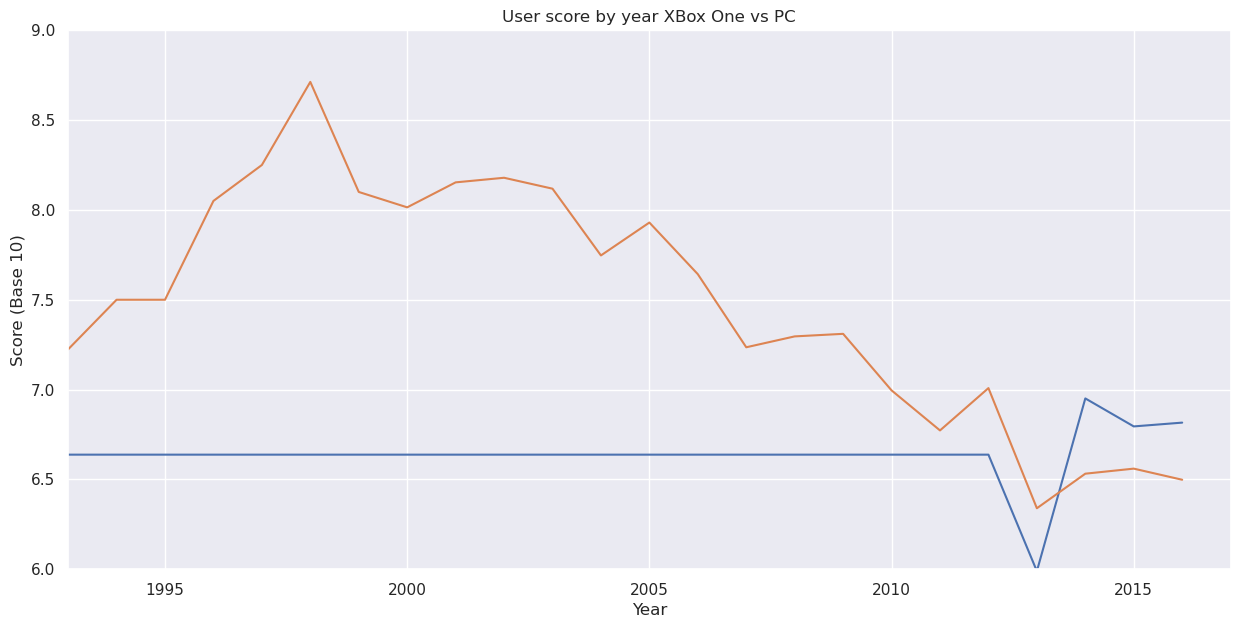

In [45]:
users_XOne.loc[1:].plot()
users_PC.loc[1:].plot(xlabel='Year',
                        ylabel='Score (Base 10)',
                        title='User score by year XBox One vs PC',
                        xlim=[1993, 2017],
                        ylim=[6, 9])

plt.show()

With the Levene test applied, we can apply an independent samples t-test with the argument equal_var as False. And we can see the p-value obtained is lower than our alpha value. So we can conclude the following statement:

 * WE REJECT THE NULE HYPHOTESIS BOTH AVERAGE VALUES FOR USERS SCORES ARE THE SAME. THEREFORE, WE ACCEPT THE ALTERNATIVE HYPHOTESIS.

In [46]:
ttest_1 = stats.ttest_ind(users_XOne, users_PC, equal_var=False)

if ttest_1.pvalue > alpha:
    print(f"Rejecting nule hyphotesis because p-value of t-test test is '{ttest_1.pvalue}'.")
else:
    print(f"Accepting nule hyphotesis because p-value of t-test test is '{ttest_1.pvalue}'.")

Accepting nule hyphotesis because p-value of t-test test is '0.0012395037248308725'.


## 5.2. Are the average users scores for action and sports genres different?

To answer this question let's establish the nule hyphotesis (H0) as the following:

 * "The average users scores for action and sports genres ARE the same".

So our alternative hyphotesis (H1) is:

 * "The average users scores for action and sports genres ARE NOT the same".

With this in mind, let's get the information organized as we need.

In [47]:
# Create a new DF with the mean user score of all years for all genres using them as index
users_genre = data.pivot_table(index='genre',
                               columns='year_of_release',
                               values='user_score',
                               aggfunc='mean',
                               observed=True)

# Get the values for XOne & PC
users_genre.loc[['Action', 'Sports']]

year_of_release,0,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
genre,,,,,,,,,,,,,,,,,,,,,
Action,7.137097,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,...,6.981905,7.236199,7.207721,7.152212,6.963025,7.140377,7.240816,7.042021,7.261660,7.088764
Sports,7.469048,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,...,7.122892,7.092000,7.202732,7.238710,7.034711,6.820370,6.122642,5.644444,5.598305,5.906250


As we do not have missing values in this case we can continue with the Levene test and propose the following nule hyphotesis:

 * The variance between populations is the same.

We accept the nule hyphotesis due ti Levene test p-value obtained.

In [48]:
users_action = users_genre.loc['Action']
users_sports = users_genre.loc['Sports']

levene_2 = stats.levene(users_action, users_sports, center='median')

if levene_2.pvalue < alpha:
    print(f"Rejecting nule hyphotesis because p-value of Levene test is '{levene_2.pvalue}'.")
else:
    print(f"Accepting nule hyphotesis because p-value of Levene test is '{levene_2.pvalue}'.")

Accepting nule hyphotesis because p-value of Levene test is '0.10358013783143602'.


Plotting new information to comprehend the information obtained.

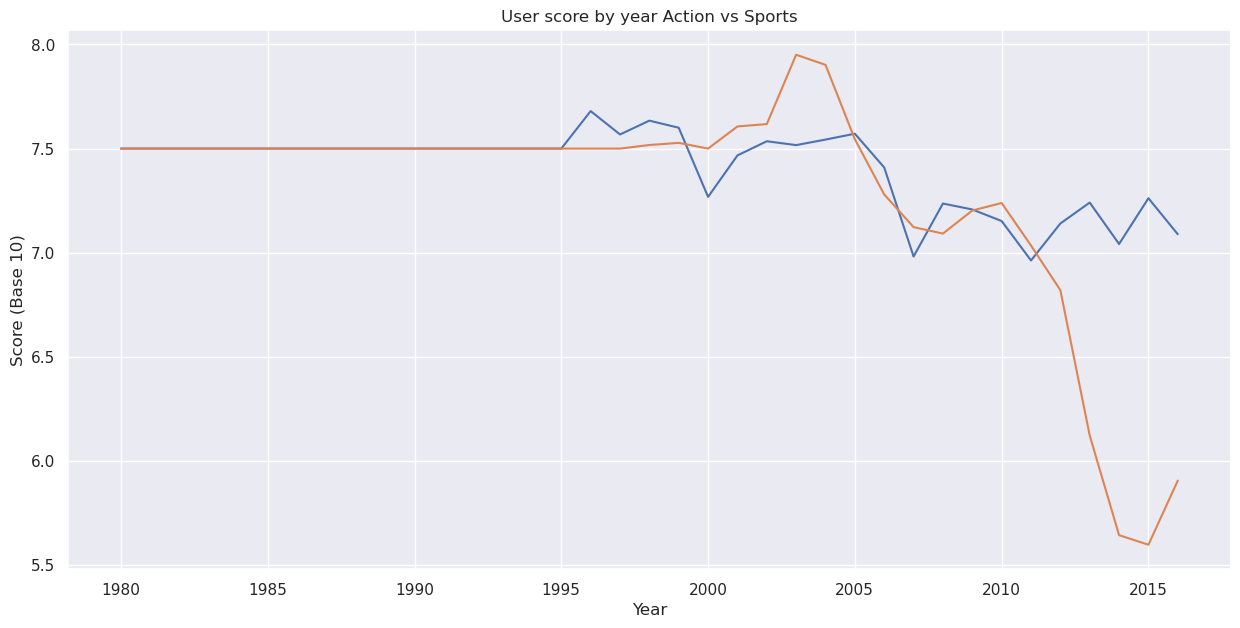

In [49]:
users_action.loc[1:].plot()
users_sports.loc[1:].plot(xlabel='Year',
                          ylabel='Score (Base 10)',
                          title='User score by year Action vs Sports')

plt.show()

With the Levene test applied, we can apply an independent samples t-test with the argument equal_var as True. And we can see the p-value obtained is higher than our alpha value. So we can conclude the following statement:

 * WE ACCEPT THE NULE HYPHOTESIS BOTH AVERAGE VALUES FOR USERS SCORES ARE THE SAME FOR THE ACTION AND SPORTS GENRES. THEREFORE, WE REJECT THE ALTERNATIVE HYPHOTESIS.

In [50]:
ttest_2 = stats.ttest_ind(users_action, users_sports, equal_var=True)

if ttest_2.pvalue > alpha:
    print(f"Rejecting nule hyphotesis because p-value of t-test test is '{ttest_2.pvalue}'.")
else:
    print(f"Accepting nule hyphotesis because p-value of t-test test is '{ttest_2.pvalue}'.")

Rejecting nule hyphotesis because p-value of t-test test is '0.21068198107297334'.


# 6. General conclusions

 * 1. The videpgames sales vary considerably between regions, genres, and years so we need to focus on a specific strategy and prove if it can work for a specific region.

 * 2. Despite not being apparent, we can dare to propose helping on current strategies comparing their results with past strategies results (which are no longer on 'life-cycle'). Positive and regular current results may indicate those strategies may work on future years (like the PS4 comparing with the PS3 & PS2 sales) and negative results may indicate the opposite (like the WiiU & the Wii).

 * 3. In case of the videogame industry, the users score is more relevant than the critic score (as we could see on this notebook).

 * 4. It is necessary to be careful with atypical data (as in the DS title published on 1985 and the lost of information on tha japanese region titles rating) so you can determine how to continue working with the data you have.